In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1️⃣ Load and View Data

In [18]:
print("--- Step 1: Load Data ---")
df = pd.read_csv("D:/Darshil/Study_material/Red & White/Supervised Learning Algorithms/Exam-5/Car_Purchasing_Data.csv")
print(" First 5 Rows:")
print(df.head())
print("\n Shape of Data:", df.shape)
print("\n Column Names:", df.columns.tolist())

--- Step 1: Load Data ---
 First 5 Rows:
     Customer Name                                    Customer e-mail Country  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu     USA   
1    Harlan Barnes                                eu.dolor@diam.co.uk     USA   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...     USA   
3  Jade Cunningham                            malesuada@dignissim.com     USA   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net     USA   

   Gender  Age  Annual Salary  Credit Card Debt    Net Worth  \
0       0   42    62812.09301      11609.380910  238961.2505   
1       0   41    66646.89292       9572.957136  530973.9078   
2       1   43    53798.55112      11160.355060  638467.1773   
3       1   58    79370.03798      14426.164850  548599.0524   
4       1   57    59729.15130       5358.712177  560304.0671   

   Car Purchase Amount  
0          35321.45877  
1          45115.52566  
2          4


# 2️⃣ Check for Missing Values

In [3]:
print("\n🔍 Checking Missing Values:")
print(df.isnull().sum())
print("\n No major missing values found!" if df.isnull().sum().sum() == 0 else " Missing values detected!")


🔍 Checking Missing Values:
Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

 No major missing values found!


# 3️⃣ Descriptive statistics

In [4]:
print("\n Descriptive Statistics:")
print(df.describe())


 Descriptive Statistics:
           Gender         Age  Annual Salary  Credit Card Debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.224000   62127.239608       9607.645049   
std      0.500465    7.990339   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   41.000000   54391.977195       7397.515792   
50%      1.000000   46.000000   62915.497035       9655.035568   
75%      1.000000   52.000000   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            Net Worth  Car Purchase Amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.0000

In [5]:
print("\nVariance:\n", df.var(numeric_only=True))
print("\nSkewness:\n", df.skew(numeric_only=True))
print("\nKurtosis:\n", df.kurt(numeric_only=True))


Variance:
 Gender                 2.504649e-01
Age                    6.384552e+01
Annual Salary          1.369691e+08
Credit Card Debt       1.217443e+07
Net Worth              3.011501e+10
Car Purchase Amount    1.160614e+08
dtype: float64

Skewness:
 Gender                -0.024074
Age                    0.008082
Annual Salary         -0.087478
Credit Card Debt      -0.063724
Net Worth              0.139755
Car Purchase Amount   -0.030791
dtype: float64

Kurtosis:
 Gender                -2.007466
Age                   -0.072968
Annual Salary          0.096049
Credit Card Debt       0.099149
Net Worth             -0.334066
Car Purchase Amount    0.227238
dtype: float64


# 4️⃣ Univariate Analysis

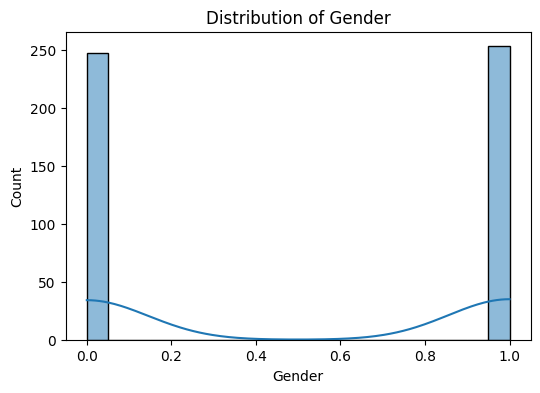

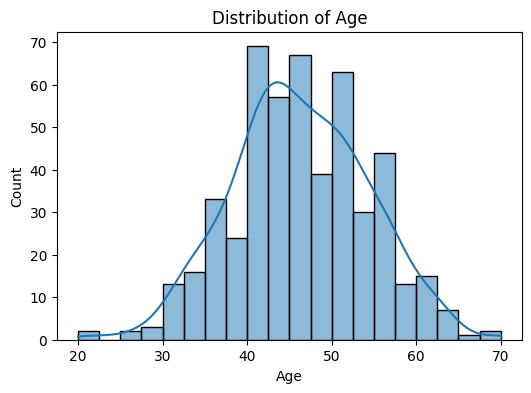

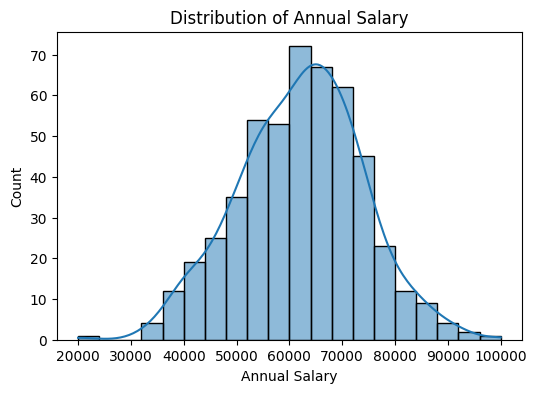

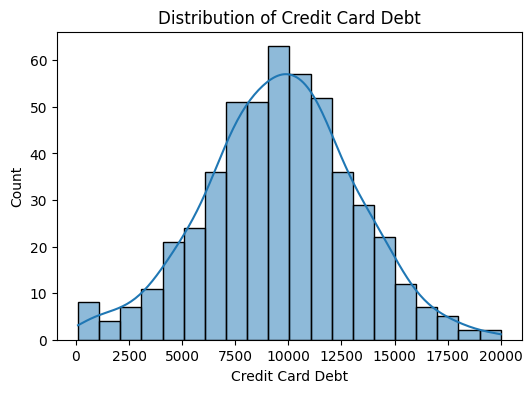

In [6]:
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols[:4]:  # only show first 4 for simplicity
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

# 5️⃣ Bivariate Analysis (relationships with target)

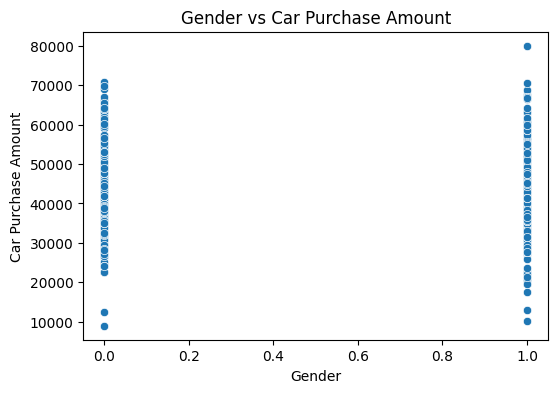

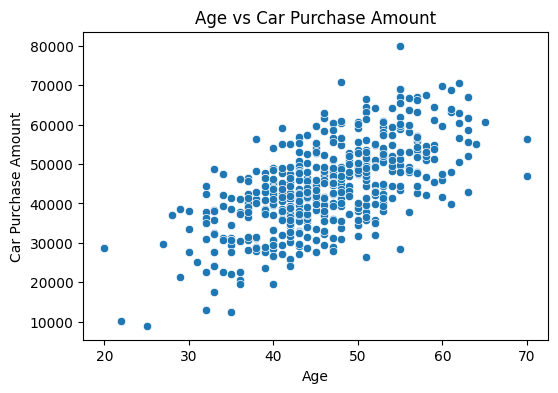

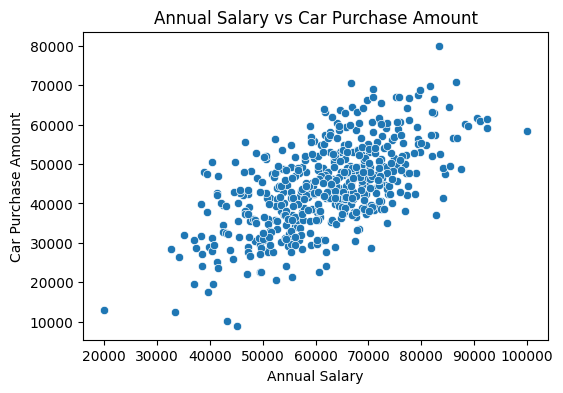

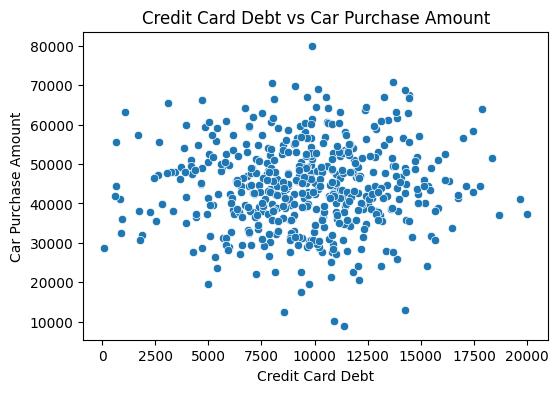

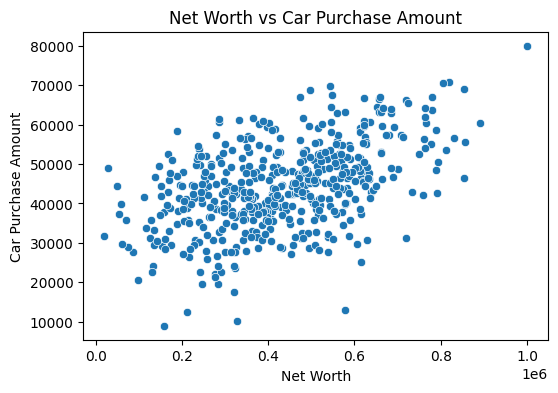

In [7]:
target = 'Car Purchase Amount'
for col in num_cols:
    if col != target:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"{col} vs {target}")
        plt.show()

# 6️⃣ Feature Engineering

In [8]:
# Example: Encoding Gender column
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
    print("\n Gender column encoded successfully!")

# Drop irrelevant columns like 'Customer Name', 'Customer e-mail', 'Country' if not needed
cols_to_drop = ['Customer Name', 'Customer e-mail', 'Country']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors='ignore')
print("\n Dropped unnecessary columns!")


 Gender column encoded successfully!

 Dropped unnecessary columns!


# 7️⃣ Handle Outliers (clip extreme numeric values)

In [9]:
for col in num_cols:
    lower, upper = df[col].quantile(0.05), df[col].quantile(0.95)
    df[col] = np.clip(df[col], lower, upper)
print("\nOutliers handled (clipped at 5th & 95th percentile).")


Outliers handled (clipped at 5th & 95th percentile).


# 8️⃣ Final Cleaning

In [10]:
print("\n🎯 Final Cleaned Data Ready for Modeling!")
print("Final Shape:", df.shape)
print("\nSample of Cleaned Data:")
print(df.head())


🎯 Final Cleaned Data Ready for Modeling!
Final Shape: (500, 6)

Sample of Cleaned Data:
   Gender   Age  Annual Salary  Credit Card Debt    Net Worth  \
0     NaN  42.0    62812.09301      11609.380910  238961.2505   
1     NaN  41.0    66646.89292       9572.957136  530973.9078   
2     NaN  43.0    53798.55112      11160.355060  638467.1773   
3     NaN  58.0    79370.03798      14426.164850  548599.0524   
4     NaN  57.0    59729.15130       5358.712177  560304.0671   

   Car Purchase Amount  
0         35321.458770  
1         45115.525660  
2         42925.709210  
3         62070.497829  
4         55915.462480  


In [11]:
df.columns

Index(['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

# 🧩 Step 9: Split the Data

In [12]:
from sklearn.model_selection import train_test_split

# Features (input) and target (output)
X = df.drop('Car Purchase Amount', axis=1)
y = df['Car Purchase Amount']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# ⚙️ Step 10: Scale or Normalize Features

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

d:\Darshil\Study_material\Red & White\Supervised Learning Algorithms\Exam-5\myenv\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\Darshil\Study_material\Red & White\Supervised Learning Algorithms\Exam-5\myenv\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\Darshil\Study_material\Red & White\Supervised Learning Algorithms\Exam-5\myenv\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


# 🔁 Step 11: Model Comparison

In [14]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df[['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']]
y = df['Car Purchase Amount']

# Encode categorical column
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models to test
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    print(f"{name} -> MSE: {mse:.2f}, R2: {r2:.2f}")

# Find the best model
best_model_name = max(results, key=results.get)
print(f"\nBest model: {best_model_name} with R2 = {results[best_model_name]:.2f}")


C:\Users\admin\AppData\Local\Temp\ipykernel_1688\399191569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = le.fit_transform(X['Gender'])


Linear Regression -> MSE: 4086253.34, R2: 0.96
Ridge Regression -> MSE: 4100627.71, R2: 0.96
Lasso Regression -> MSE: 4087116.40, R2: 0.96
Decision Tree -> MSE: 10775681.80, R2: 0.89
Random Forest -> MSE: 5293672.08, R2: 0.94
Gradient Boosting -> MSE: 3731108.85, R2: 0.96

Best model: Gradient Boosting with R2 = 0.96


# ✅ Step 12: Final Model & Prediction

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = gbr.predict(X_test_scaled)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor -> MSE: {mse:.2f}, R2: {r2:.2f}")

# Predict for new data (example)
# prediction = gbr.predict(new_data_scaled)
# print(f"Predicted Car Purchase Amount: {prediction[0]:.2f}")


Gradient Boosting Regressor -> MSE: 3459242.19, R2: 0.96


In [16]:
# train_model.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Encode Gender
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# Features and target
X = df[["Gender", "Age", "Annual Salary", "Credit Card Debt", "Net Worth"]]
y = df["Car Purchase Amount"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Gradient Boosting Regressor (your settings)
gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Train model
gbr.fit(X_train_scaled, y_train)

# Evaluate performance
y_pred = gbr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor -> MSE: {mse:.2f}, R2: {r2:.2f}")

# ✅ Save model, scaler, and label encoder together
with open("model.pkl", "wb") as file:
    pickle.dump((gbr, scaler, le), file)

print("✅ Model, scaler, and encoder saved successfully as model.pkl")

Gradient Boosting Regressor -> MSE: 3459242.19, R2: 0.96
✅ Model, scaler, and encoder saved successfully as model.pkl
